In [99]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline


In [100]:
words=open('indian_names.txt','r').read().splitlines()
len(words)

6487

In [101]:
chs=sorted(list(set(''.join(words))))
stoi={s:i for i,s in enumerate(chs)}
stoi['.']=0
itos={i:s for s,i in stoi.items()}
print(itos)
    

{0: '.', 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z'}


In [102]:
block_size=3 # context length i.e from how many chars we predict the next one
x,y=[],[] 
for w in words:
    # print(w)
    context=[0]*block_size #initially it has context 3
    for ch in w+'.':
        ix=stoi[ch]
        x.append(context)
        y.append(ix)
        # print(''.join((itos[i]) for i in context),'----->',itos[ix]) #converts the context into the list
        context=context[1:]+[ix] # to remove the first element and add the new element in the last to update the context
x=torch.tensor(x)
y=torch.tensor(y)


In [103]:
x.shape ,x.dtype ,y.shape,y.dtype

(torch.Size([47706, 3]), torch.int64, torch.Size([47706]), torch.int64)

In [104]:
C=torch.randn(27,2).float() #look up table to embed the vector
C

tensor([[-0.8326,  0.1123],
        [-0.2222,  0.2580],
        [-0.9221, -1.1125],
        [-1.7863,  0.0695],
        [ 1.8523,  0.2417],
        [-2.1755, -0.9829],
        [ 0.0642,  0.6133],
        [-0.8620, -0.3709],
        [-0.6481, -1.0909],
        [-0.2229, -0.6450],
        [ 0.5360, -0.4394],
        [ 0.1169, -0.9868],
        [-0.6014, -1.9404],
        [-1.9827,  0.1427],
        [ 1.0809,  1.2510],
        [ 0.6769,  1.1121],
        [-0.3711,  1.8111],
        [ 0.1339, -0.8725],
        [ 1.7399,  1.3288],
        [-1.2279, -0.5871],
        [-0.6858,  0.8152],
        [ 0.7161,  0.4709],
        [-0.8646,  1.3216],
        [ 0.0044,  0.6650],
        [-0.4800,  1.0121],
        [-0.4444,  0.2456],
        [ 0.6006, -0.6921]])

In [105]:
C[5]

tensor([-2.1755, -0.9829])

In [106]:
C[[5,6,7]] # call with a list of value

tensor([[-2.1755, -0.9829],
        [ 0.0642,  0.6133],
        [-0.8620, -0.3709]])

In [107]:
C[x] .shape#X as a value passes to C

torch.Size([47706, 3, 2])

In [108]:
# emb=C[x]plt.plot(lri,lossi)

In [109]:
# torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape # its only for fixed block size 3


In [110]:
W1=torch.randn(6,100)
b1=torch.randn(100)

In [111]:
# emb=torch.cat(torch.unbind(emb,1),1).shape # for all block size

In [112]:
emb=C[x]

In [113]:
h=torch.tanh(emb.view(-1,6) @ W1 + b1) # -1 for any value in x like 32
h

tensor([[-0.8634, -0.9998,  0.9636,  ..., -0.9516, -0.8518,  0.5841],
        [-0.7921, -0.9949,  0.9408,  ..., -0.9157, -0.4668, -0.2266],
        [-0.7236, -0.9753,  0.9295,  ..., -0.9752, -0.1533, -0.6785],
        ...,
        [ 0.9665, -0.9994,  0.9956,  ..., -0.9993, -0.6273, -0.5202],
        [ 0.9466, -1.0000,  0.9778,  ..., -0.9820, -0.3478,  0.9536],
        [-0.9982, -0.9996,  0.6437,  ...,  0.9149, -0.9714,  0.8760]])

In [114]:
W2=torch.randn(100,27)
b2=torch.randn(27)
logits=h @ W2 + b2 #softmax function
counts=logits.log() #finding fake counts to normalize the values
prob=counts/counts.sum(1,keepdim=True)
#instead of using the 3 lines ,we use cross entropy to find the loss
prob.shape

torch.Size([47706, 27])

In [115]:
y

tensor([1, 1, 2,  ..., 5, 2, 0])

In [116]:
g=torch.Generator().manual_seed(2147483647)
C=torch.randn((27,10),generator =g ,requires_grad=True) # using 10 for 10 neurons 
W1=torch.randn((30,200),generator=g) # there are three unputs for each neuron 
b1=torch.randn((200),generator=g) #using broadcasting to take copy of valiues
W2=torch.randn((200,27),generator=g) #gives a character from 27 characters so we are using 27
b2=torch.randn((27),generator=g)
parameters=[C,W1,b1,W2,b2]

In [117]:
sum(p.nelement() for p in parameters)

11897

In [118]:
for p in parameters:
    p.requires_grad=True

In [119]:
# for _ in range(100):
#     #forward pass
#     emb=C[x]
#    print(''.join((itos[i]) for i in context),'----->',itos[ix])   h=torch.tanh(emb.view(-1,6) @ W1 + b1)
#     logits=h @ W2 + b2
#     loss=F.cross_entropy(logits,y)
#     print(loss.item())
#     #backward pass
#     for p in parameters:
#          p.grad=None
#     loss.backward()
#     #update
#     for p in parameters:
#          p.data+=-0.1*p.grad
# print(loss.item())


In [120]:
torch.randint(0,5,(32,))


tensor([1, 2, 2, 0, 0, 0, 4, 4, 2, 4, 2, 0, 4, 1, 2, 3, 1, 3, 4, 2, 0, 2, 3, 1,
        1, 0, 1, 1, 2, 4, 1, 0])

In [121]:
lre=torch.linspace(-3,0,1000)
lrs=10**lre

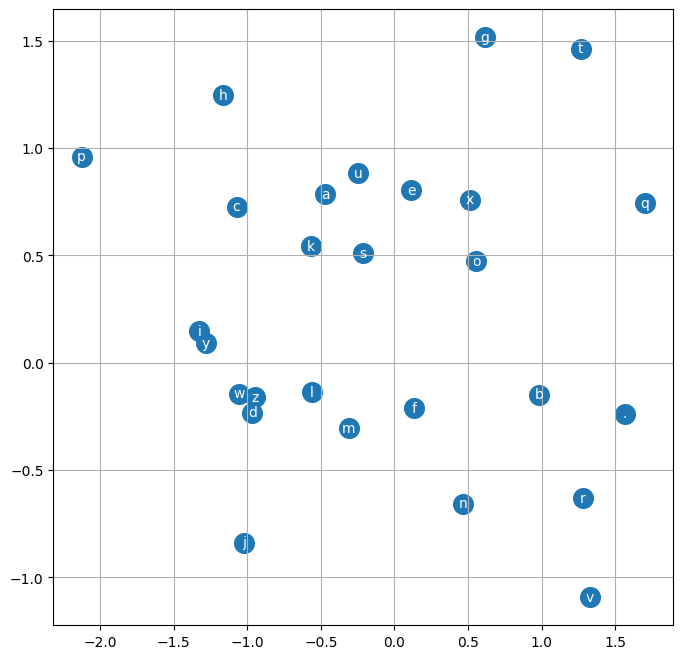

In [122]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [123]:
# plt.plot(lri,lossi)

In [124]:
# to avoid overfiting
# #80% - training split
#10% - dev/validation split
#10% - test split

In [125]:
#creating a dataset
def build_dataset(words): #TO split in three parts
    block_size=3 # context length i.e from how many chars we predict the next one
    x,y=[],[] 
    for w in words:
       print(w)
       context=[0]*block_size #initially it has context 3
       for ch in w+'.':
          ix=stoi[ch]
          x.append(context)
          y.append(ix)
        #   print(''.join((itos[i]) for i in context),'----->',itos[ix])   #converts the context into the list
          context=context[1:]+[ix] # to remove the first element and add the new element in the last to update the context
    x=torch.tensor(x)
    y=torch.tensor(y)
    print(x.shape,y.shape)
    return x,y
import random
random.seed(42)
random.shuffle(words) # shuffle all the words in a particular ordergit config --global
n1=int(0.8*len(words)) #0.8 * 32000=28000 (app)
n2=int(0.9*len(words)) #0.9 * 32000=25000
xtr,ytr=build_dataset(words[:n1])
xdev,ydev=build_dataset(words[n1:n2]) #n1-n2
xte,yte=build_dataset(words[n2:])


ikara
shardanand
anirudh
chran
rashmi
tisha
ajeem
rahi
ovaish
aradhana
sajida
rajvi
amjad
jamrujaha
sushpal
rajenderi
monika
sunder
afridi
supna
charan
abishak
navjoot
nagma
deepanker
vijayta
nisar
gufraan
ramnath
dhurve
serul
anjali
bintu
aasu
sahil
isha
tohid
najimuddin
baban
hayatul
susan
sohni
ranu
chitro
sedarath
kuwarjeet
viriya
yashodha
sohib
subburaiyalu
jiyaul
dharmraj
israil
sukhvinder
brijpal
sultana
aarifun
karnesh
shib
supyar
ashlam
rai
sakil
shika
harender
aruni
ashima
kalpadma
abbal
kelama
shailja
hazi
beena
salauddin
minaksi
sakib
kumar
aashish
sabhya
roobi
souvik
kosalya
anam
nida
purnima
tanuj
bawan
druga
mandvi
gendu
komal
mahbir
kirshn
trilock
chintu
khadak
jabbar
yaadram
mantu
bhag
hasina
pawna
pinky
subodh
mahadevi
brijshwaer
ramkumari
sikender
bhanupriya
sweety
deyji
sehzada
beekar
shambu
arpit
papp
sahishta
mustkim
anoura
jhakar
anli
jagpati
somnath
anantram
hasibullah
luv
ilyas
rasab
neesha
roshni
ranjan
muntiyaj
sabeeha
chetana
mis
sahiba
bobby
sajmeen
rambhoo

In [151]:
# using xtr and ytr
lri=[]
lossi=[]
stepi=[]
for i in range(5000):
    ix=torch.randint(0,xtr.shape[0],(32,)) #mini batch constructed
    emb=C[xtr[ix]] #32,3,10 
    h=torch.tanh(emb.view(-1,30) @ W1 + b1) 
    logits=h @ W2 + b2
    loss=F.cross_entropy(logits,ytr[ix])
    #print(loss.item())
    #backward pass
    for p in parameters:
         p.grad=None
    loss.backward()
    #update
    lr=0.01
    for p in parameters:
         p.data+=-lr*p.grad
    # lri.append(lre[i])
    lossi.append(loss.log10().item())
    stepi.append(i)
print(loss.item())

3.3344004154205322


In [145]:
ix=torch.randint(0,xdev.shape[0],(32,)) #mini batch constructed
emb=C[xdev[ix]] #32,3,2 
h=torch.tanh(emb.view(-1,30) @ W1 + b1)
logits=h @ W2 + b2
loss=F.cross_entropy(logits,ydev[ix])
loss

tensor(6.6262, grad_fn=<NllLossBackward0>)

In [148]:
ix=torch.randint(0,xte.shape[0],(32,)) #mini batch constructed
emb=C[xte[ix]] #32,3,2 
h=torch.tanh(emb.view(-1,30) @ W1 + b1)
logits=h @ W2 + b2
loss=F.cross_entropy(logits,yte[ix])
loss

tensor(6.1074, grad_fn=<NllLossBackward0>)

In [129]:
xte.shape,yte.shape

(torch.Size([4731, 3]), torch.Size([4731]))

In [130]:
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(50):
    
    out = []
    context = [0] * block_size #initialize blocksize
    while True:
      emb = C[torch.tensor([context])] 
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

nrrucadurhmvyrhgid.
naoi.
naos.
naoishajesarj.
naoi.
hs.
naoitha.
naoishan.
nao.
naoit.
hohshrnnsh.
bmm.
naoit.
shvwyvsyccymgu.
bshlpozshvwyvsycyhwaesyhlhrnn.
hsewgesarjicyhwaesyxshvwyvsyccymgu.
nao.
naoit.
shmlkiojyynnurhovwvnucovy.
naoitha.
hsrrnsh.
naoit.
nao.
naos.
ha.
naoisha.
hs.
naoish.
bmm.
bshlpozshvwyvsyccymguba.
naoia.
naoi.
muhony.
naoith.
bmm.
hs.
bmm.
hs.
nal.
naoisha.
naoisha.
naoi.
ialyikkouyhan.
nao.
naoisha.
yalisovy.
nao.
naoi.
naoisha.
naoi.
